<font size="6">Project Proposal: Predicting Quality of Wine </font>

<font size="5">Introduction</font>

Wine quality is a rating important to many people, connoisseurs and distributors alike. The quality of a wine can be a factor in determining its value and thus is regarded quite often. There are a multitude of factors in a wine that can contribute to its overall rating. 

Thus, this project will analyze contributors and develop a system adept to determining the value of batches of wine. We aim to predict the quality of wine using a regression model based on the three factors we determined to be the most important: Volatile Acididy, Chlorides, and Total Sulfur Dioxide.

The dataset, with 6497 rows and 13 columns, is obtained from the UCI Machine Learning Repository. It can be found at https://www.kaggle.com/datasets/rajyellow46/wine-quality, and displays a number of measurable factors of wines including but not limited to those mentioned above - as well as the quality rating of each wine (rated on a scale of zero to ten). Not all quality levels are represented equally. It was collected in 2009 and combines two data sets. A total of 11 measured factors of wine are present, some represented in a scale of integers and others on a continuous scale. We have researched and selected the three above factors to predict quality as not all factors are of equal importance.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [13]:
wine_quality <- read_csv(file = "/home/jovyan/dsci-project/DSCI-Project/winequalityN.csv", show_col_types = FALSE)

names(wine_quality) <- make.names(colnames(wine_quality))

white_quality <- filter(wine_quality, type == "white") |>
                select(volatile.acidity, chlorides, total.sulfur.dioxide, quality) |>
                na.omit(volatile.acidity, chlorides, total.sulfur.dioxide, quality)
white_quality$volatile.acidity <- as.numeric(white_quality$volatile.acidity)
white_quality$chlorides<-as.numeric(white_quality$chlorides)
white_quality$total.sulfur.dioxide<-as.numeric(white_quality$total.sulfur.dioxide)
white_quality$quality<-as.numeric(white_quality$quality)

In [14]:
set.seed(135)
wine_split <- initial_split(white_quality, prop = 0.75, strata = quality)
wine_train <- training (wine_split)
wine_test <- testing(wine_split)

In [15]:
#summarize with training data

In [16]:
wine_table <- wine_train|>
    group_by(quality)|>           
    summarize(mean.vol = mean(volatile.acidity), mean.chlor = mean(chlorides), 
              mean.sulf = mean(total.sulfur.dioxide))

wine_table

quality,mean.vol,mean.chlor,mean.sulf
<dbl>,<dbl>,<dbl>,<dbl>
3,0.3291176,0.05535294,169.2059
4,0.4001250,0.05068333,126.7625
5,0.3007202,0.05107064,150.3908
6,0.2615350,0.04503830,137.3249
7,0.2590364,0.03859939,125.1563
8,0.2809470,0.03792424,123.8409
9,0.3150000,0.02800000,104.5000


In [17]:
#plot with training data

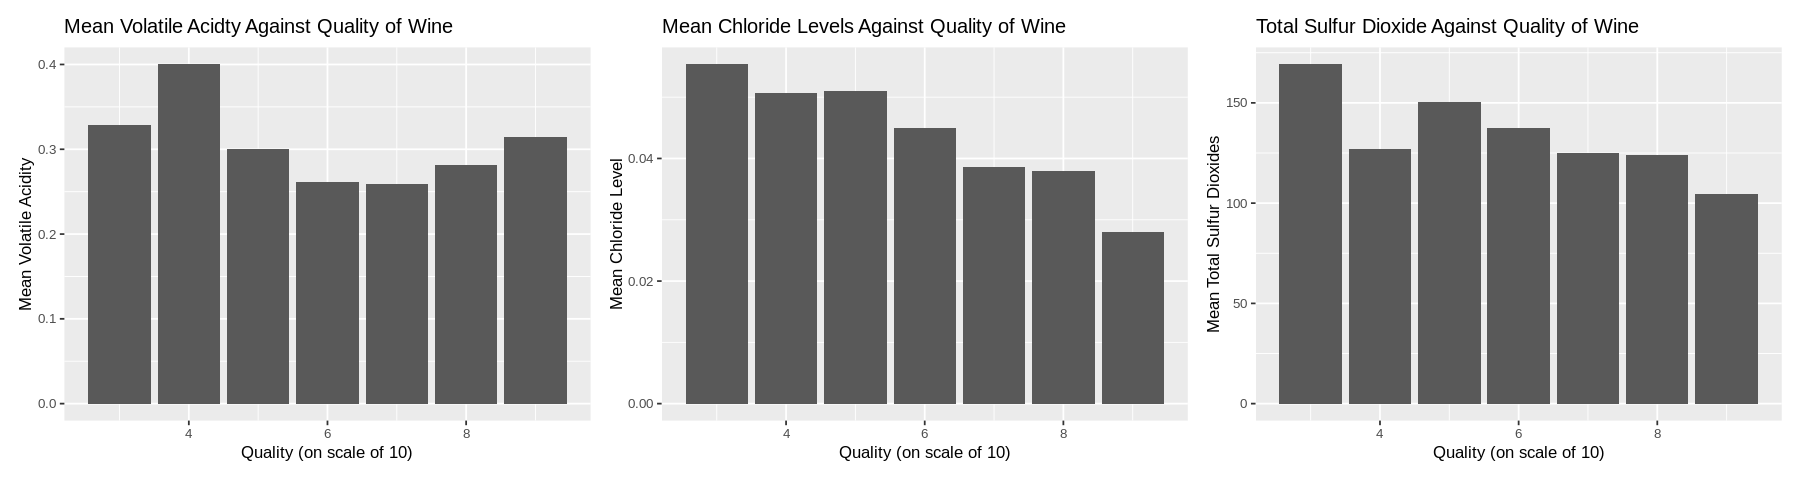

In [19]:
library(ggplot2)
library(patchwork)

options(repr.plot.height = 4, repr.plot.width = 15)
plot_wine_vol <- wine_table |>
                    ggplot(aes(x= quality, y=mean.vol))+
                           geom_bar(stat = "identity") +
                           labs(x = "Quality (on scale of 10)", y =  "Mean Volatile Acidity", 
                                title = "Mean Volatile Acidty Against Quality of Wine")+
                                theme(text = element_text(size = 10))
                        

plot_wine_chlor <- wine_table |>
                    ggplot(aes(x= quality, y=mean.chlor))+
                           geom_bar(stat = "identity") +
                           labs(x = "Quality (on scale of 10)", y = "Mean Chloride Level", 
                                title = "Mean Chloride Levels Against Quality of Wine")+
                                theme(text = element_text(size = 10))
plot_wine_sulf <- wine_table |>
                    ggplot(aes(x= quality, y=mean.sulf))+
                           geom_bar(stat = "identity") +
                           labs(x = "Quality (on scale of 10)", y = "Mean Total Sulfur Dioxides", 
                                title = "Total Sulfur Dioxide Against Quality of Wine")+
                                theme(text = element_text(size = 10))
                            
plot_wine_vol+plot_wine_chlor+plot_wine_sulf

<font size="5">Methods</font>

We will conduct our data analysis by carrying out a classification model adept to determining wine quality using these three variables: volatile acidity, total sulfur dioxide, and chlorides. We chose these because we believe them to be the most predictive of quality in comparison to the others. We are limiting the type of wine to white wine so that our prediction is more accurate as red and white wine could have different levels of variables that determine what is “good” quality. Our model will be visualized with three scatterplots each containing a predictive factor against the quality of each wine overlayed by the predictive values.

<font size="5">Expected Outcomes and Significance</font>

We expect to find an inverse relationship between total sulfur dioxide and white wine quality, and an inverse relationship between chlorides and white wine quality, and an curvilinear relationship between volatile acidity and quality of white wine. This predictor could impact how experts measure or determine quality and could then be used in a similar fashion for other white wines and red wines as well. Potentially, understanding the combinations of these factors that create good quality wine could impact the processes makers use to try to attain similar levels in their own wine.
